In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.neighbors import LocalOutlierFactor
from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [2]:
# A random seed is a starting point in generating random numbers for computations. By setting the seed, we are ensuring that the sequence of random numbers generated is fixed and reproducible.

In [3]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# **1) Dataset Preparation:**

In [4]:
df = pd.read_csv('star_classification.csv')
df.shape

(100000, 18)

In [5]:
df.sample(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
75721,1.237679e+18,16.956890,3.646130,23.33542,21.95143,20.48149,19.60300,19.13094,7712,301,6,442,4.855017e+18,GALAXY,0.506237,4312,55511,495
80184,1.237662e+18,240.063240,6.134131,17.86033,16.79228,16.43001,16.30923,16.25873,3894,301,1,243,2.448928e+18,STAR,0.000345,2175,54612,348
19864,1.237679e+18,30.887222,1.188710,18.18911,16.89469,16.42161,16.24627,16.18549,7717,301,1,536,8.255357e+18,STAR,0.000004,7332,56683,943
76699,1.237668e+18,247.594401,10.887780,24.99961,21.71203,21.47148,21.30532,21.29109,5323,301,1,134,4.577999e+18,STAR,-0.000291,4066,55444,326
92991,1.237679e+18,18.896451,-5.261330,23.76648,21.79737,20.69543,20.23403,19.97464,7881,301,3,148,8.910472e+18,STAR,-0.000136,7914,57331,363


In [6]:
# This Dataset has 18 features and 100000 data points

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
# This problem originally involves three classes. However, we are simplifying it to a binary classification by only considering the "GALAXY" and "STAR" classes.

In [9]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

# **2) Dataset Pre-processing:**

In [10]:
df1 = df.copy()
df1 = df1[df1['class'] != 'QSO']
df1.sample(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
18651,1.237647e+18,120.760881,-0.323750,20.18874,18.04045,17.10881,16.75779,16.64366,308,301,2,96,8.389118e+18,STAR,0.000444,7451,56739,138
36743,1.237671e+18,42.702021,34.537309,19.47893,18.10531,17.49190,17.25419,17.12719,5934,301,5,169,8.167445e+18,STAR,0.000122,7254,56625,608
33079,1.237661e+18,220.179021,42.710771,17.79608,16.23045,15.56904,15.21980,14.95392,3699,301,6,189,1.571913e+18,GALAXY,0.040379,1396,53112,571
63036,1.237658e+18,128.326315,5.105369,24.63466,21.52777,20.84914,19.97606,22.82691,2986,301,6,66,5.392154e+18,STAR,0.000095,4789,55923,798
27243,1.237656e+18,4.417879,15.022571,22.59921,20.69192,19.02521,18.40393,18.02068,2566,301,4,337,6.962730e+18,GALAXY,0.301355,6184,56267,600


In [11]:
# The "STAR" class is the smaller of the two, comprising 21,594 data points, while the "GALAXY" class is larger with 59,445 data points.

In [12]:
df1['class'].value_counts()

class
GALAXY    59445
STAR      21594
Name: count, dtype: int64

In [13]:
# we represent the 'GALAXY' class with a 0, while the 'STAR' class is denoted by 1.

In [14]:
df1['class'].replace({'GALAXY': 0, 'STAR': 1}, inplace = True)

In [15]:
df1.sample(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
11087,1.237655e+18,227.149860,-1.557491,25.39968,21.42608,20.59920,20.26007,20.29999,2334,301,4,209,1.038242e+18,1,0.000088,922,52426,590
87608,1.237668e+18,150.608459,21.378692,23.45529,22.55221,21.73930,21.27704,21.05502,5138,301,4,71,1.082565e+19,0,0.258063,9615,57870,456
60368,1.237679e+18,339.090291,3.497086,22.43694,20.10387,18.49353,17.85930,17.49599,7712,301,6,190,4.831309e+18,0,0.283980,4291,55525,264
55415,1.237665e+18,173.939166,35.632606,17.97109,16.78120,16.33732,16.07993,15.94425,4552,301,6,41,2.379031e+18,0,0.038829,2113,53468,17
90412,1.237668e+18,190.962173,22.191248,21.02208,19.00422,17.67890,17.09674,16.71361,5183,301,3,386,2.981433e+18,0,0.193542,2648,54485,181


In [16]:
df1['class'].value_counts()

class
0    59445
1    21594
Name: count, dtype: int64

In [17]:
# Pie Chart representing number of data points under each class.

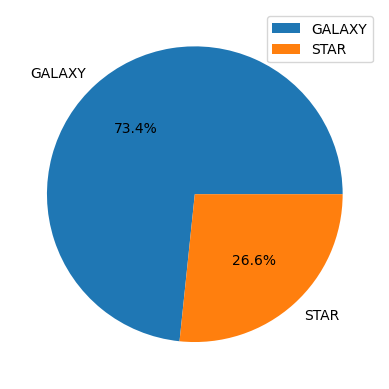

In [18]:
plt.pie(df1['class'].value_counts(), autopct="%1.1f%%", labels=['GALAXY', 'STAR'])
plt.legend()

# **Check for Missing Values:**

In [19]:
# There are no missing values in our dataset.

In [20]:
df1.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [21]:
df1[df1['class'] == 0].shape, df1[df1['class'] == 1].shape

((59445, 18), (21594, 18))

# **Detecting Outliers:**

In [22]:
# The purpose of this code is to detect and remove outliers from the dataset using the Local Outlier Factor (LOF) method.

In [23]:
# Instantiate the LocalOutlierFactor model
lof_model = LocalOutlierFactor()

# Fit the model to the data and get predictions
predictions = lof_model.fit_predict(df1)

# Get the negative outlier factor scores
lof_scores = lof_model.negative_outlier_factor_

# Create a DataFrame to store the scores
outlier_scores_df = pd.DataFrame()
outlier_scores_df["lof_score"] = lof_scores

# Set a threshold for outlier detection
outlier_threshold = -1.5
is_outlier = outlier_scores_df["lof_score"] < outlier_threshold

# Get the indices of the outliers
detected_outliers = outlier_scores_df[is_outlier].index.tolist()
len(detected_outliers)

11575

In [24]:
outliers_index = list(set(detected_outliers) & set(df1.index))
len(outliers_index)

9461

In [25]:
# Drop outlier index values
df1.drop(outliers_index, inplace=True)

In [26]:
df1['class'].value_counts()

class
0    52537
1    19041
Name: count, dtype: int64

In [27]:
# Removes below columns from the dataframe `df1` which are unnecessary or irrelevant for further analysis.

In [28]:
df1.drop(['run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID','obj_ID'], axis=1, inplace = True)

In [29]:
df1.sample(5)

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
34970,16.596039,4.375856,22.56670,22.76008,21.82710,21.32228,21.15675,0,0.862050,9436,58103
41942,245.481223,62.761903,18.22586,16.60549,15.97266,15.71602,15.58969,1,-0.000320,2550,54206
49361,212.128242,65.890093,24.77479,20.47240,18.76581,18.16518,17.89754,0,0.331987,6986,56717
6035,164.879298,27.268504,20.54793,18.24798,17.23619,16.85455,16.59535,1,-0.000105,2855,54466
16942,331.191760,12.566698,23.30139,22.12628,20.86453,19.94006,19.27407,0,0.599647,5064,55864


In [30]:
df1.shape

(71578, 11)

In [31]:
df1['class'].value_counts()

class
0    52537
1    19041
Name: count, dtype: int64

In [32]:
# This code represents the count of unique values for each attribute.

In [33]:
df1.nunique()

alpha       71578
delta       71578
u           68372
g           67859
r           67565
i           67323
z           67132
class           2
redshift    71070
plate        6201
MJD          2171
dtype: int64

In [34]:
# This code represents the unique values for each attribute.

In [35]:
for column in df1:
  print(df1[column].unique())

[135.6891066  144.82610055 142.18878956 ... 224.58740744 212.26862112
 196.89605297]
[32.49463184 31.27418489 35.58244418 ... 15.70070739 46.66036528
 49.46464277]
[23.87882 24.77759 25.26307 ... 21.16916 25.35039 22.62171]
[22.2753  22.83188 22.66389 ... 19.26997 21.63757 21.79745]
[20.39501 22.58444 20.60976 ... 18.20428 19.91386 20.60115]
[19.16573 21.16812 19.34857 ... 17.69034 19.07254 20.00959]
[18.79371 21.61427 18.94827 ... 19.41526 17.35221 18.62482]
[0 1]
[0.6347936 0.779136  0.6441945 ... 0.1433656 0.4550396 0.5429442]
[ 5812 10445  4576 ... 11384 11385 10471]
[56354 58158 55592 ... 57673 51688 53855]


In [36]:
df1['class'].value_counts()

class
0    52537
1    19041
Name: count, dtype: int64

# **3) Feature Scaling:**

In [37]:
# The below code applies MinMax scaling to all columns in the dataframe `df1`, except for the 'class' column. This brings all the values ranging from 0 to 1.

In [38]:
columns_to_scale = [col for col in df1.columns if col != 'class']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])
df1.sample(5)

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
57213,0.652465,0.301290,0.998917,0.998633,0.354832,0.320918,0.998832,0,0.051274,0.183210,0.359503
56650,0.649993,0.449453,0.999273,0.999120,0.567835,0.491684,0.999186,0,0.352622,0.300220,0.507100
20408,0.625335,0.525531,0.999313,0.999176,0.600034,0.522940,0.999198,0,0.415153,0.853432,0.902785
62815,0.322990,0.522941,0.999003,0.998704,0.386008,0.351767,0.998904,0,0.046873,0.022474,0.052567
11615,0.506163,0.600289,0.999139,0.998956,0.555312,0.534049,0.999299,1,0.004550,0.660858,0.806253


In [39]:
galaxy = df1[df1['class'] == 0]
star = df1[df1['class'] == 1]
len(galaxy), len(star)

(52537, 19041)

# **4) Dataset Splitting into Train and Test:**

In [40]:
# Based on the specifications, we've taken the size of the smaller class and divided it by three to determine the test size. Subsequently, we sampled this test size from each class and combined them

In [41]:
# Create Test Set Preparation
test_size = len(star) // 3
test_galaxy = galaxy.sample(test_size)
test_star = star.sample(test_size)

test = pd.concat([test_galaxy, test_star])
test.reset_index(drop=True, inplace=True)

len(test_galaxy), len(test_star), len(test)

(6347, 6347, 12694)

In [42]:
# Here, we perform oversampling, for balancing the smaller class.

In [43]:
# Training Set Preparation
train_galaxy = galaxy.drop(test_galaxy.index)
train_star = star.drop(test_star.index)

train_star_balanced = train_star.sample(len(train_galaxy), replace=True)
train = pd.concat([train_galaxy, train_star_balanced])
train.reset_index(drop=True, inplace=True)

len(train_galaxy), len(train_star), len(train_star_balanced), len(train)

(46190, 12694, 46190, 92380)

In [44]:
X_train = train.drop('class', axis = 'columns')
y_train = train['class']

X_test = test.drop('class', axis = 'columns')
y_test = test['class']

In [45]:
# Below are the shapes of X_train, y_train, X_test, and y_test after sampling. This shows that we have balanced dataset.

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((92380, 10), (92380,), (12694, 10), (12694,))

In [47]:
y_train.value_counts()

class
0    46190
1    46190
Name: count, dtype: int64

In [48]:
y_test.value_counts()

class
0    6347
1    6347
Name: count, dtype: int64

# **5) Model Building:**

In [49]:
# Defining h-h-1 feedforward NN Model 
def train_model(X_train, y_train, X_test, y_test, learning_rate=0.001):
    
    # Determine the number of input features from the training data.
    input_shape = X_train.shape[1]

    # Define a simple feed-forward neural network model with a single hidden layer.
    model = tf.keras.Sequential([
        keras.layers.Dense(input_shape, input_shape=(input_shape, ), activation='tanh'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # Initialize the Adam optimizer with the provided learning rate.
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Define an early stopping callback to halt training if accuracy doesn't improve for 10 consecutive epochs.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
    
    # Train the model for a maximum of 50 epochs, using a batch size of 32.
    # Training data is provided, and accuracy is also validated on the test data.
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])
    return model, history

In [50]:
model, history = train_model(X_train, y_train, X_test, y_test)

Epoch 1/50
2887/2887 [==============================] - 7s 2ms/step - loss: 0.3421 - accuracy: 0.8849 - val_loss: 0.1484 - val_accuracy: 0.9595
Epoch 2/50
2887/2887 [==============================] - 6s 2ms/step - loss: 0.1049 - accuracy: 0.9758 - val_loss: 0.0746 - val_accuracy: 0.9838
Epoch 3/50
2887/2887 [==============================] - 6s 2ms/step - loss: 0.0612 - accuracy: 0.9851 - val_loss: 0.0481 - val_accuracy: 0.9875
Epoch 4/50
2887/2887 [==============================] - 6s 2ms/step - loss: 0.0446 - accuracy: 0.9897 - val_loss: 0.0377 - val_accuracy: 0.9909
Epoch 5/50
2887/2887 [==============================] - 6s 2ms/step - loss: 0.0376 - accuracy: 0.9915 - val_loss: 0.0333 - val_accuracy: 0.9924
Epoch 6/50
2887/2887 [==============================] - 6s 2ms/step - loss: 0.0342 - accuracy: 0.9927 - val_loss: 0.0297 - val_accuracy: 0.9943
Epoch 7/50
2887/2887 [==============================] - 6s 2ms/step - loss: 0.0319 - accuracy: 0.9933 - val_loss: 0.0309 - val_accuracy:

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


397/397 [==============================] - 1s 2ms/step - loss: 0.0216 - accuracy: 0.9957
Test Loss: 0.02163219265639782
Test Accuracy: 0.9956672191619873
397/397 [==============================] - 1s 937us/step


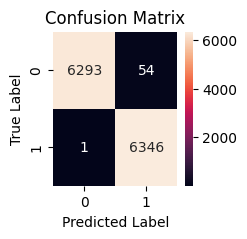

In [52]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict classes
y_pred = model.predict(X_test)

# Since, the outputs are in the range of 0 and 1 for sigmoid, we consider the values as 0 if y_pred < 0.5, else the value is treated as 1
y_pred_classes = np.where(y_pred < 0.5, 0, 1)

# # Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(2,2))
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()